In [1]:
import qubic.pygsti.qupig as qupig
import qubic.pygsti.pygsti_rb as pygsti_rb
from importlib import reload
import pygsti
import qubic.job_manager_jpm as _jm
from pygsti.models import modelconstruction as _mc
from matplotlib import pyplot as plt
from qubic.state_disc import GMMManager
from distproc.hwconfig import FPGAConfig, load_channel_configs
import chipcalibration.config as cfg
import qubic.rpc_client as rc
import chipcalibration.rabi_experiments as _rabi
import numpy as np

In [2]:
reload(_jm)
reload(_rabi)

<module 'chipcalibration.rabi_experiments' from '/home/jpmarceaux/chipcalibration/chipcalibration/rabi_experiments.py'>

In [3]:
targets = ['Q2', 'Q3']

## [1] setup a GMM Manager (should really just be loading a GMM Manager from file)

In [4]:
# setup the job manager for a rabi run
fpga_config = FPGAConfig(**{'fpga_clk_period': 2.e-9, 'alu_instr_clks': 5, 'jump_cond_clks': 5, 'jump_fproc_clks': 5, 'pulse_regwrite_clks': 3})

qchipname = 'X4Y2'
fpga_config, qchip, channel_config = cfg.load_configs(qchipname)

runner = rc.CircuitRunnerClient(ip='192.168.1.247')
jm = _jm.JobManager(fpga_config, channel_config, runner, qchip)

In [5]:
# pick one of the drive amps for GMM training, 
# doesn't really matter which, I'll use the max
assert len(targets) == 2
drive_amp = max(qchip.gates[f'{targets[0]}X90'].cfg_dict[0]['amp'], 
                qchip.gates[f'{targets[1]}X90'].cfg_dict[0]['amp'])
print('Drive amp for GMM training:', drive_amp)

Drive amp for GMM training: 0.3724137931034483


In [6]:
# GMM Rabi 
pulse_widths = np.linspace(1.e-9, 50.e-9, 10)
gmm_rabi = _rabi.GMMRabi(targets, drive_amp, pulse_widths, 
                       channel_configs=channel_config)

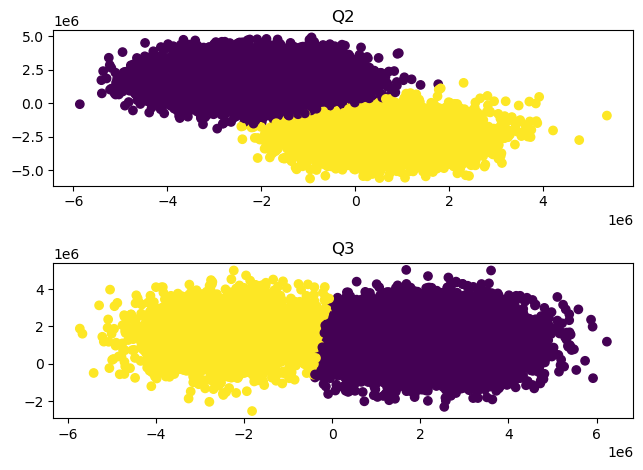

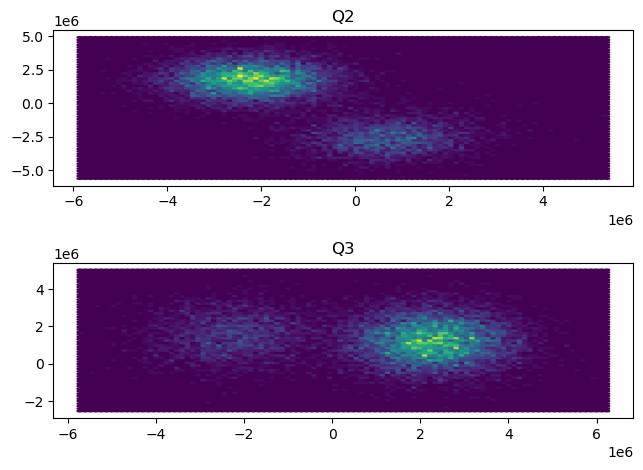

In [7]:
gmm_rabi.run_and_report(jm, 1000, qchip=qchip)

In [8]:
gmm_manager = gmm_rabi.gmm_manager

## [2] run rb using a pygsti job manager

In [9]:
reload(pygsti_rb)
reload(qupig)
reload(_jm)

<module 'qubic.job_manager_jpm' from '/home/jpmarceaux/software/qubic/job_manager_jpm.py'>

In [10]:
# setup the pygsti job manager
fpga_config = FPGAConfig(**{'fpga_clk_period': 2.e-9, 'alu_instr_clks': 5, 'jump_cond_clks': 5, 'jump_fproc_clks': 5, 'pulse_regwrite_clks': 3})

qchipname = 'X4Y2'
fpga_config, qchip, channel_config = cfg.load_configs(qchipname)

runner = rc.CircuitRunnerClient(ip='192.168.1.247')
pygsti_jm = _jm.PyGSTiJobManager(fpga_config, channel_config, runner, qchip, gmm_manager)

# Running RB on Q2

In [11]:
# make the processor spec
register = ['Q2'] # these correspond to the actual qubit id's on the qubic device
gate_names = ['Gxpi2', 'Gzpi2']

availability = {
    'Gxpi2': [(qid, ) for qid in register],
    'Gzpi2': [(qid, ) for qid in register],
}

pspec = pygsti.processors.QubitProcessorSpec(num_qubits=len(register), gate_names=gate_names,
                                 availability=availability, qubit_labels=register)


In [12]:
crb = pygsti_rb.CliffordRB(pspec, depths=[0, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512])

- Sampling 10 circuits at CRB length 0 (1 of 11 depths) with seed 803092
- Sampling 10 circuits at CRB length 1 (2 of 11 depths) with seed 803102
- Sampling 10 circuits at CRB length 2 (3 of 11 depths) with seed 803112
- Sampling 10 circuits at CRB length 4 (4 of 11 depths) with seed 803122
- Sampling 10 circuits at CRB length 8 (5 of 11 depths) with seed 803132
- Sampling 10 circuits at CRB length 16 (6 of 11 depths) with seed 803142
- Sampling 10 circuits at CRB length 32 (7 of 11 depths) with seed 803152
- Sampling 10 circuits at CRB length 64 (8 of 11 depths) with seed 803162
- Sampling 10 circuits at CRB length 128 (9 of 11 depths) with seed 803172
- Sampling 10 circuits at CRB length 256 (10 of 11 depths) with seed 803182
- Sampling 10 circuits at CRB length 512 (11 of 11 depths) with seed 803192


In [13]:
crb.collect_dataset(pygsti_jm, 1000)

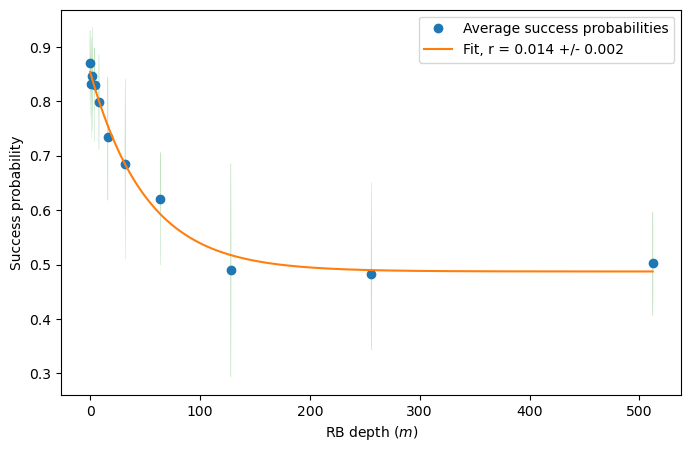

In [14]:
crb.make_report()

# Running RB on Q3

In [15]:
# make the processor spec
register = ['Q3'] # these correspond to the actual qubit id's on the qubic device
gate_names = ['Gxpi2', 'Gzpi2']

availability = {
    'Gxpi2': [(qid, ) for qid in register],
    'Gzpi2': [(qid, ) for qid in register],
}

pspec = pygsti.processors.QubitProcessorSpec(num_qubits=len(register), gate_names=gate_names,
                                 availability=availability, qubit_labels=register)


In [16]:
crb = pygsti_rb.CliffordRB(pspec, depths=[0, 1, 2, 4, 8, 16, 32, 64, 128, 256])

- Sampling 10 circuits at CRB length 0 (1 of 10 depths) with seed 988131
- Sampling 10 circuits at CRB length 1 (2 of 10 depths) with seed 988141
- Sampling 10 circuits at CRB length 2 (3 of 10 depths) with seed 988151
- Sampling 10 circuits at CRB length 4 (4 of 10 depths) with seed 988161
- Sampling 10 circuits at CRB length 8 (5 of 10 depths) with seed 988171
- Sampling 10 circuits at CRB length 16 (6 of 10 depths) with seed 988181
- Sampling 10 circuits at CRB length 32 (7 of 10 depths) with seed 988191
- Sampling 10 circuits at CRB length 64 (8 of 10 depths) with seed 988201
- Sampling 10 circuits at CRB length 128 (9 of 10 depths) with seed 988211
- Sampling 10 circuits at CRB length 256 (10 of 10 depths) with seed 988221


In [17]:
crb.collect_dataset(pygsti_jm, 1000)

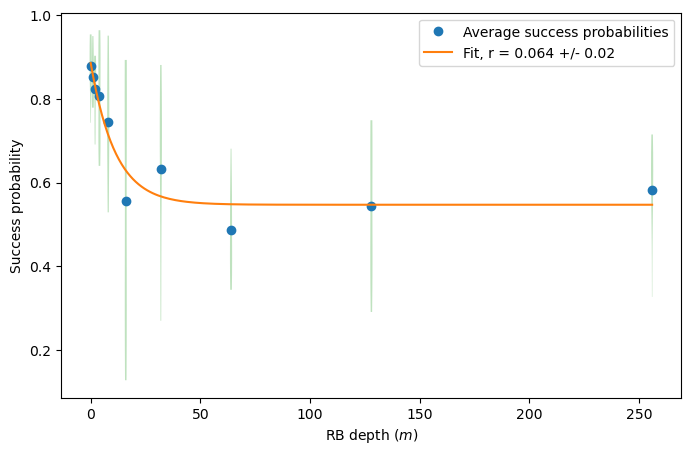

In [18]:
crb.make_report()